# CNNs

In this notebook you will learn how to build Convolutional Neural Networks (CNNs) for image processing.

## Imports

In [1]:
%matplotlib inline

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sklearn
import sys
import tensorflow as tf
from tensorflow import keras
import time

In [3]:
print("python", sys.version)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

python 3.7.2 (default, Dec 29 2018, 06:19:36) 
[GCC 7.3.0]
matplotlib 2.2.3
numpy 1.17.2
pandas 0.23.4
sklearn 0.19.2
tensorflow 2.0.0
tensorflow_core.keras 2.2.4-tf


In [4]:
assert sys.version_info >= (3, 5) # Python ≥3.5 required
assert tf.__version__ >= "2.0"    # TensorFlow ≥2.0 required

![Exercise](https://c1.staticflickr.com/9/8101/8553474140_c50cf08708_b.jpg)

## Exercise 1 – Simple CNN

### 1.1)
Load CIFAR10 using `keras.datasets.cifar10.load_data()`, and split it into a training set (45,000 images), a validation set (5,000 images) and a test set (10,000 images). Make sure the pixel values range from 0 to 1. Visualize a few images using `plt.imshow()`.

In [5]:
classes = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
]

In [6]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [7]:
x_train, x_valid = x_train[:-5000], x_train[-5000:]
y_train, y_valid = y_train[:-5000], y_train[-5000:]

In [8]:
y_valid.shape

(5000, 1)

In [9]:
x_test.shape

(10000, 32, 32, 3)

### 1.2)
Build and train a baseline model with a few dense layers, and plot the learning curves. Use the model's `summary()` method to count the number of parameters in this model.

**Tip**:

* Recall that to plot the learning curves, you can simply create a Pandas `DataFrame` with the `history.history` dict, then call its `plot()` method.

### 1.3)
Build and train a Convolutional Neural Network using a "classical" architecture: N * (Conv2D → Conv2D → Pool2D) → Flatten → Dense → Dense. Before you print the `summary()`, try to manually calculate the number of parameters in your model's architecture, as well as the shape of the inputs and outputs of each layer. Next, plot the learning curves and compare the performance with the previous model.

### 1.4)
Looking at the learning curves, you can see that the model is overfitting. Add a Batch Normalization layer after each convolutional layer. Compare the model's performance and learning curves with the previous model.

**Tip**: there is no need for an activation function just before the pooling layers.

![Exercise solution](https://camo.githubusercontent.com/250388fde3fac9135ead9471733ee28e049f7a37/68747470733a2f2f75706c6f61642e77696b696d656469612e6f72672f77696b6970656469612f636f6d6d6f6e732f302f30362f46696c6f735f736567756e646f5f6c6f676f5f253238666c69707065642532392e6a7067)

## Exercise 1 – Solution

### 1.1)
Load CIFAR10 using `keras.datasets.cifar10.load_data()`, and split it into a training set (45,000 images), a validation set (5,000 images) and a test set (10,000 images). Make sure the pixel values range from 0 to 1. Visualize a few images using `plt.imshow()`.

In [10]:
classes = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
]

In [11]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.cifar10.load_data()
X_train = X_train_full[:-5000] / 255
y_train = y_train_full[:-5000]
X_valid = X_train_full[-5000:] / 255
y_valid = y_train_full[-5000:]
X_test = X_test / 255

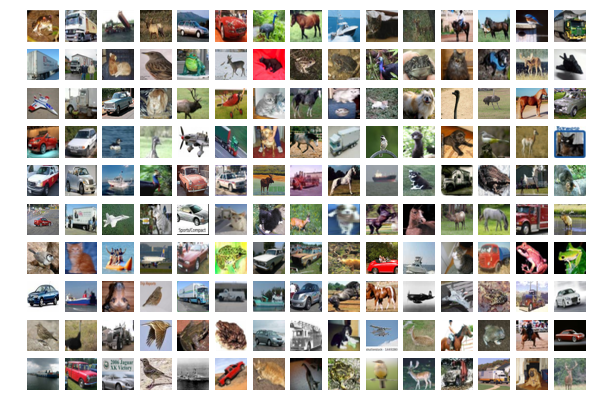

In [12]:
plt.figure(figsize=(10, 7))
n_rows, n_cols = 10, 15
for row in range(n_rows):
    for col in range(n_cols):
        i = row * n_cols + col
        plt.subplot(n_rows, n_cols, i + 1)
        plt.axis("off")
        plt.imshow(X_train[i])

Let's print the classes of the images in the first row:

In [13]:
for i in range(n_cols):
    print(classes[y_train[i][0]], end=" ")

frog truck truck deer automobile automobile bird horse ship cat deer horse horse bird truck 

### 1.2)
Build and train a baseline model with a few dense layers, and plot the learning curves. Use the model's `summary()` method to count the number of parameters in this model.

**Tip**:

* Recall that to plot the learning curves, you can simply create a Pandas `DataFrame` with the `history.history` dict, then call its `plot()` method.

In [14]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[32, 32, 3]),
    keras.layers.Dense(64, activation="selu"),
    keras.layers.Dense(64, activation="selu"),
    keras.layers.Dense(64, activation="selu"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=0.01), metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Train on 45000 samples, validate on 5000 samples
Epoch 1/20
45000/45000 [==============================] - 4s 79us/sample - loss: 1.9121 - accuracy: 0.3116 - val_loss: 2.0127 - val_accuracy: 0.2708
Epoch 2/20
45000/45000 [==============================] - 3s 65us/sample - loss: 1.7172 - accuracy: 0.3828 - val_loss: 1.7985 - val_accuracy: 0.3642
Epoch 3/20
45000/45000 [==============================] - 3s 66us/sample - loss: 1.6409 - accuracy: 0.4156 - val_loss: 2.3852 - val_accuracy: 0.2640
Epoch 4/20
45000/45000 [==============================] - 3s 66us/sample - loss: 1.5877 - accuracy: 0.4343 - val_loss: 1.7928 - val_accuracy: 0.3668
Epoch 5/20
45000/45000 [==============================] - 3s 76us/sample - loss: 1.5461 - accuracy: 0.4480 - val_loss: 1.7139 - val_accuracy: 0.3800
Epoch 6/20
45000/45000 [==============================] - 3s 75us/sample - loss: 1.5157 - accuracy: 0.4601 - val_loss: 1.5753 - val_accuracy: 0.4414
Epoch 7/20
45000/45000 [==============================] -

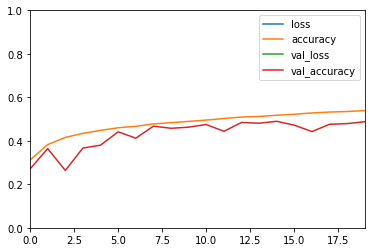

In [15]:
pd.DataFrame(history.history).plot()
plt.axis([0, 19, 0, 1])
plt.show()

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                196672    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 205,642
Trainable params: 205,642
Non-trainable params: 0
_________________________________________________________________


### 1.3)
Build and train a Convolutional Neural Network using a "classical" architecture: N * (Conv2D → Conv2D → Pool2D) → Flatten → Dense → Dense. Before you print the `summary()`, try to manually calculate the number of parameters in your model's architecture, as well as the shape of the inputs and outputs of each layer. Next, plot the learning curves and compare the performance with the previous model.

In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[32, 32, 3]),
    keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"),
    keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=0.01), metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Train on 45000 samples, validate on 5000 samples
Epoch 1/20
45000/45000 [==============================] - 80s 2ms/sample - loss: 1.9530 - accuracy: 0.2945 - val_loss: 1.7532 - val_accuracy: 0.3700
Epoch 2/20
45000/45000 [==============================] - 97s 2ms/sample - loss: 1.5478 - accuracy: 0.4498 - val_loss: 1.5087 - val_accuracy: 0.4568
Epoch 3/20
45000/45000 [==============================] - 96s 2ms/sample - loss: 1.3490 - accuracy: 0.5187 - val_loss: 1.4498 - val_accuracy: 0.4840
Epoch 4/20
45000/45000 [==============================] - 84s 2ms/sample - loss: 1.2201 - accuracy: 0.5643 - val_loss: 1.2254 - val_accuracy: 0.5690
Epoch 5/20
45000/45000 [==============================] - 87s 2ms/sample - loss: 1.1141 - accuracy: 0.6072 - val_loss: 1.1362 - val_accuracy: 0.5944
Epoch 6/20
22624/45000 [==============>...............] - ETA: 41s - loss: 1.0283 - accuracy: 0.6382

In [ ]:
pd.DataFrame(history.history).plot()
plt.axis([0, 19, 0, 1])
plt.show()

In [ ]:
# Number of params in a convolutional layer =
# (kernel_width * kernel_height * channels_in + 1 for bias) * channels_out
(
    (3 * 3 * 3 + 1)  * 32  # in: 32x32x3   out: 32x32x32  Conv2D
  + (3 * 3 * 32 + 1) * 32  # in: 32x32x32  out: 32x32x32  Conv2D
  + 0                      # in: 32x32x32  out: 16x16x32  MaxPool2D
  + (3 * 3 * 32 + 1) * 64  # in: 16x16x32  out: 16x16x64  Conv2D
  + (3 * 3 * 64 + 1) * 64  # in: 16x16x64  out: 16x16x64  Conv2D
  + 0                      # in: 16x16x64  out: 8x8x64    MaxPool2D
  + 0                      # in: 8x8x64    out: 4096      Flatten
  + (4096 + 1) * 128       # in: 4096      out: 128       Dense
  + (128 + 1) * 10         # in: 128       out: 10        Dense
)

Let's check:

In [ ]:
model.summary()

### 1.4)
Looking at the learning curves, you can see that the model is overfitting. Add a Batch Normalization layer after each convolutional layer. Compare the model's performance and learning curves with the previous model.

**Tip**: there is no need for an activation function just before the pooling layers.

In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[32, 32, 3]),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=0.01), metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

In [ ]:
pd.DataFrame(history.history).plot()
plt.axis([0, 19, 0, 1])
plt.show()

![Exercise](https://c1.staticflickr.com/9/8101/8553474140_c50cf08708_b.jpg)

## Exercise 2 – Separable Convolutions

### 2.1)
Replace the `Conv2D` layers with `SeparableConv2D` layers (except the first one), fit your model and compare its performance and learning curves with the previous model.

### 2.2)
Try to estimate the number of parameters in your network, then check your result with `model.summary()`.

**Tip**: the batch normalization layer adds two parameters for each feature map (the scale and bias).

![Exercise solution](https://camo.githubusercontent.com/250388fde3fac9135ead9471733ee28e049f7a37/68747470733a2f2f75706c6f61642e77696b696d656469612e6f72672f77696b6970656469612f636f6d6d6f6e732f302f30362f46696c6f735f736567756e646f5f6c6f676f5f253238666c69707065642532392e6a7067)

## Exercise 2 – Solution

### 2.1)
Replace the `Conv2D` layers with `SeparableConv2D` layers (except the first one), fit your model and compare its performance and learning curves with the previous model.

In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[32, 32, 3]),
    keras.layers.BatchNormalization(),
    keras.layers.SeparableConv2D(filters=32, kernel_size=3, padding="same", activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.SeparableConv2D(filters=64, kernel_size=3, padding="same", activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.SeparableConv2D(filters=64, kernel_size=3, padding="same", activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=0.01), metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

In [ ]:
pd.DataFrame(history.history).plot()
plt.axis([0, 19, 0, 1])
plt.show()

### 2.2)
Try to estimate the number of parameters in your network, then check your result with `model.summary()`.

**Tip**: the batch normalization layer adds two parameters for each feature map (the scale and bias).

In [ ]:
# Number of params in a depthwise separable 2D convolution layer =
# kernel_width * kernel_height * channels_in + (channels_in + 1 for bias) * channels_out
(
    (3 * 3 * 3 + 1) * 32        # in: 32x32x3   out: 32x32x32  Conv2D
  + 32 * 2                      # in: 32x32x32  out: 32x32x32  BN
  + 3 * 3 * 32 + (32 + 1) * 32  # in: 32x32x32  out: 32x32x32  SeparableConv2D
  + 32 * 2                      # in: 32x32x32  out: 32x32x32  BN
  + 0                           # in: 32x32x32  out: 16x16x32  MaxPool2D
  + 3 * 3 * 32 + (32 + 1) * 64  # in: 16x16x32  out: 16x16x64  SeparableConv2D
  + 64 * 2                      # in: 16x16x64  out: 16x16x64  BN
  + 3 * 3 * 64 + (64 + 1) * 64  # in: 16x16x64  out: 16x16x64  SeparableConv2D
  + 64 * 2                      # in: 16x16x64  out: 16x16x64  BN
  + 0                           # in: 16x16x64  out: 8x8x64    MaxPool2D
  + 0                           # in: 8x8x64    out: 4096      Flatten
  + (4096 + 1) * 128            # in: 4096      out: 128       Dense
  + (128 + 1) * 10              # in: 128       out: 10        Dense
)

Let's check:

In [ ]:
model.summary()

![Exercise](https://c1.staticflickr.com/9/8101/8553474140_c50cf08708_b.jpg)

## Exercise 3 – Pretrained CNNs

### 3.1)
Using `keras.preprocessing.image.load_img()` followed by `keras.preprocessing.image.img_to_array()`, load one or more images (e.g., `fig.jpg` or `ostrich.jpg` in the `images` folder). You should set `target_size=(299, 299)` when calling `load_img()`, as this is the shape that the Xception network expects.

### 3.2)
Create a batch containing the image(s) you just loaded, and preprocess this batch using `keras.applications.xception.preprocess_input()`. Verify that the features now vary from -1 to 1: this is what the Xception network expects.

### 3.3)
Create an instance of the Xception model (`keras.applications.xception.Xception`) and use its `predict()` method to classify the images in the batch. You can use `keras.applications.resnet50.decode_predictions()` to convert the output matrix into a list of top-N predictions (with their corresponding class labels).

![Exercise solution](https://camo.githubusercontent.com/250388fde3fac9135ead9471733ee28e049f7a37/68747470733a2f2f75706c6f61642e77696b696d656469612e6f72672f77696b6970656469612f636f6d6d6f6e732f302f30362f46696c6f735f736567756e646f5f6c6f676f5f253238666c69707065642532392e6a7067)

## Exercise 3 – Solution

### 3.1)
Using `keras.preprocessing.image.load_img()` followed by `keras.preprocessing.image.img_to_array()`, load one or more images (e.g., `fig.jpg` or `ostrich.jpg` in the `images` folder). You should set `target_size=(299, 299)` when calling `load_img()`, as this is the shape that the Xception network expects.

In [ ]:
img_fig_path = os.path.join("images", "fig.jpg")
img_fig = keras.preprocessing.image.load_img(img_fig_path, target_size=(299, 299))
img_fig = keras.preprocessing.image.img_to_array(img_fig)

In [ ]:
plt.imshow(img_fig / 255)
plt.axis("off")
plt.show()
img_fig.shape

In [ ]:
img_ostrich_path = os.path.join("images", "ostrich.jpg")
img_ostrich = keras.preprocessing.image.load_img(img_ostrich_path, target_size=(299, 299))
img_ostrich = keras.preprocessing.image.img_to_array(img_ostrich)

In [ ]:
plt.imshow(img_ostrich / 255)
plt.axis("off")
plt.show()
img_ostrich.shape

### 3.2)
Create a batch containing the image(s) you just loaded, and preprocess this batch using `keras.applications.xception.preprocess_input()`. Verify that the features now vary from -1 to 1: this is what the Xception network expects.

In [ ]:
X_batch = np.array([img_fig, img_ostrich])
X_preproc = keras.applications.xception.preprocess_input(X_batch)

In [ ]:
X_preproc.min(), X_preproc.max()

### 3.3)
Create an instance of the Xception model (`keras.applications.xception.Xception`) and use its `predict()` method to classify the images in the batch. You can use `keras.applications.resnet50.decode_predictions()` to convert the output matrix into a list of top-N predictions (with their corresponding class labels).

In [ ]:
model = keras.applications.xception.Xception()
Y_proba = model.predict(X_preproc)

In [ ]:
Y_proba.shape

In [ ]:
np.argmax(Y_proba, axis=1)

In [ ]:
decoded_predictions = keras.applications.resnet50.decode_predictions(Y_proba)
for preds in decoded_predictions:
    for wordnet_id, name, proba in preds:
        print("{} ({}): {:.1f}%".format(name, wordnet_id, 100 * proba))
    print()

![Exercise](https://c1.staticflickr.com/9/8101/8553474140_c50cf08708_b.jpg)

## Exercise 4 – Data Augmentation and Transfer Learning
In this exercise you will reuse a pretrained Xception model to build a flower classifier.

First, let's download the dataset:

In [ ]:
import tensorflow as tf
from tensorflow import keras
import os

flowers_url = "http://download.tensorflow.org/example_images/flower_photos.tgz"
flowers_path = keras.utils.get_file("flowers.tgz", flowers_url, extract=True)
flowers_dir = os.path.join(os.path.dirname(flowers_path), "flower_photos")

In [ ]:
for root, subdirs, files in os.walk(flowers_dir):
    print(root)
    for filename in files[:3]:
        print("   ", filename)
    if len(files) > 3:
        print("    ...")

### 4.1)
Build a `keras.preprocessing.image.ImageDataGenerator` that will preprocess the images and do some data augmentation (the [documentation](https://keras.io/preprocessing/image/) contains useful examples):

* It should at least perform horizontal flips and keep 10% of the data for validation, but you may also make it perform a bit of rotation, rescaling, etc.
* Also make sure to apply the Xception preprocessing function (using the `preprocessing_function` argument).
* Call this generator's `flow_from_directory()` method to get an iterator that will load and preprocess the flower photos from the `flower_photos` directory, setting the target size to (299, 299) and `subset` to `"training"`.
* Call this method again with the same parameters except `subset="validation"` to get a second iterator for validation.
* Get the next batch from the validation iterator and display the first image from the batch.

### 4.2)
Now let's build the model:
* Create a new `Xception` model, but this time set `include_top=False` to get the model without the top layer. **Tip**: you will need to access its `input` and `output` properties.
* Make all its layers non-trainable.
* Using the functional API, add a `GlobalAveragePooling2D` layer (feeding it the Xception model's output), and add a `Dense` layer with 5 neurons and the Softmax activation function.
* Compile the model. **Tip**: don't forget to add the `"accuracy"` metric.
* Fit your model using `fit_generator()`, passing it the training and validation iterators (and setting `steps_per_epoch` and `validation_steps` appropriately).

![Exercise solution](https://camo.githubusercontent.com/250388fde3fac9135ead9471733ee28e049f7a37/68747470733a2f2f75706c6f61642e77696b696d656469612e6f72672f77696b6970656469612f636f6d6d6f6e732f302f30362f46696c6f735f736567756e646f5f6c6f676f5f253238666c69707065642532392e6a7067)

## Exercise 4 – Solution

### 4.1)
Build a `keras.preprocessing.image.ImageDataGenerator` that will preprocess the images and do some data augmentation (the [documentation](https://keras.io/preprocessing/image/) contains useful examples):

* It should at least perform horizontal flips and keep 10% of the data for validation, but you may also make it perform a bit of rotation, rescaling, etc.
* Also make sure to apply the Xception preprocessing function (using the `preprocessing_function` argument).
* Call this generator's `flow_from_directory()` method to get an iterator that will load and preprocess the flower photos from the `flower_photos` directory, setting the target size to (299, 299) and `subset` to `"training"`.
* Call this method again with the same parameters except `subset="validation"` to get a second iterator for validation.
* Get the next batch from the validation iterator and display the first image from the batch.

In [ ]:
datagen = keras.preprocessing.image.ImageDataGenerator(
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.1,
    preprocessing_function=keras.applications.xception.preprocess_input)

train_generator = datagen.flow_from_directory(
        flowers_dir,
        target_size=(299, 299),
        batch_size=32,
        subset="training")

valid_generator = datagen.flow_from_directory(
        flowers_dir,
        target_size=(299, 299),
        batch_size=32,
        subset="validation")

In [ ]:
X_batch, y_batch = next(valid_generator)
plt.imshow((X_batch[0] + 1)/2)
plt.axis("off")
plt.show()

### 4.2)
Now let's build the model:
* Create a new `Xception` model, but this time set `include_top=False` to get the model without the top layer. **Tip**: you will need to access its `input` and `output` properties.
* Make all its layers non-trainable.
* Using the functional API, add a `GlobalAveragePooling2D` layer (feeding it the Xception model's output), and add a `Dense` layer with 5 neurons and the Softmax activation function.
* Compile the model. **Tip**: don't forget to add the `"accuracy"` metric.
* Fit your model using `fit_generator()`, passing it the training and validation iterators (and setting `steps_per_epoch` and `validation_steps` appropriately).

In [ ]:
n_classes = 5

base_model = keras.applications.xception.Xception(include_top=False)

for layer in base_model.layers:
    layer.trainable = False

global_pool = keras.layers.GlobalAveragePooling2D()(base_model.output)
predictions = keras.layers.Dense(n_classes, activation='softmax')(global_pool)

model = keras.models.Model(base_model.input, predictions)

model.compile(loss="categorical_crossentropy",
              optimizer="sgd", metrics=["accuracy"])

In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=3306 // 32,
    epochs=50,
    validation_data=valid_generator,
    validation_steps=364 // 32)

In [ ]:
pd.DataFrame(history.history).plot()
plt.axis([0, 19, 0, 1])
plt.show()

![Exercise](https://c1.staticflickr.com/9/8101/8553474140_c50cf08708_b.jpg)

## Object Detection Project

The Google [Street View House Numbers](http://ufldl.stanford.edu/housenumbers/) (SVHN) dataset contains pictures of digits in all shapes and colors, taken by the Google Street View cars. The goal is to classify and locate all the digits in large images.
* Train a Fully Convolutional Network on the 32x32 images.
* Use this FCN to build a digit detector in the large images.